In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import interpolate
from scipy import signal
from scipy.io import wavfile
from matplotlib import colormaps
from matplotlib.collections import LineCollection
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, Polygon
from matplotlib.transforms import Affine2D, Bbox
import mpl_toolkits.axisartist.floating_axes as floating_axes

sys.path.append("../..")
import timexplain as tx
import experiments.base as ex

In [2]:
plt.rc("text", usetex=True)
plt.rc("font", family="serif", size=13)
plt.rcParams["text.latex.preamble"] = r"\usepackage{bm}"

# Exemplary explanation

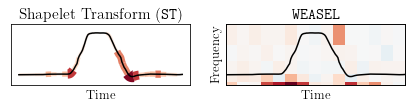

In [3]:
x_specimen = np.array([
       -0.62695602, -0.62591896, -0.62753797, -0.62632624, -0.62408545, -0.62470754, -0.62500642, -0.62417532, -0.62401803, -0.62203314, -0.62296717, -0.61967762, -0.61946229, -0.61814436,
       -0.61769863, -0.61778575, -0.61818893, -0.6181766 , -0.61953835, -0.6164082 , -0.61665925, -0.61665072, -0.61549472, -0.61248719, -0.60722477, -0.60352826, -0.59812825, -0.59191062,
       -0.59274909, -0.5907425 , -0.58918122, -0.58860158, -0.58718179, -0.58708729, -0.58760592, -0.58635015, -0.58647868, -0.58728134, -0.58708676, -0.58559058, -0.58750626, -0.58789321,
       -0.58679273, -0.58627083, -0.58812087, -0.58459672, -0.57484408, -0.53909736, -0.46781894, -0.3780703 , -0.28251553, -0.14730546, -0.02565432,  0.08932682,  0.39872496,  0.57558681,
        0.70562326,  0.81928047,  0.95915026,  1.1600961 ,  1.3722696 ,  1.6090559 ,  1.8142691 ,  1.9523911 ,  2.005412  ,  2.0310863 ,  2.0411146 ,  2.0584777 ,  2.0585722 ,  2.0664066 ,
        2.0712873 ,  2.0719651 ,  2.0707276 ,  2.0646814 ,  2.0631246 ,  2.0657015 ,  2.0657015 ,  2.0666776 ,  2.0601889 ,  2.0535727 ,  2.0354601 ,  1.9945898 ,  1.9432569 ,  1.8442691 ,
        1.6998211 ,  1.5404575 ,  1.3767714 ,  1.2161136 ,  1.0655225 ,  0.94005205,  0.81198775,  0.68370316,  0.59455891,  0.47897095,  0.19162292,  0.01964593, -0.14655527, -0.24994932,
       -0.37998893, -0.50773993, -0.60756621, -0.68332272, -0.72712743, -0.74353195, -0.74282895, -0.73142748, -0.70672225, -0.68391416, -0.66611027, -0.65288373, -0.6433066 , -0.63710277,
       -0.63227807, -0.62815469, -0.62083931, -0.61483101, -0.60712268, -0.60026137, -0.5921131 , -0.58739059, -0.58507384, -0.58448389, -0.58348148, -0.58531868, -0.58982016, -0.59000168,
       -0.59141684, -0.59169254, -0.59136238, -0.5934779 , -0.59450148, -0.59348117, -0.59555308, -0.59770737, -0.60066749, -0.60458639, -0.60645108, -0.61094919, -0.61618908, -0.61686384,
       -0.62001948, -0.62150481, -0.62152598, -0.62409104, -0.62398853, -0.62434988, -0.62437622, -0.61947093, -0.61205789, -0.60642232])

ts_impacts_st = np.array([
        0.00656379,  0.00588742,  0.00643476,  0.00800835,  0.00776153,  0.02265182,  0.01358833,  0.0076313 ,  0.02060812,  0.04597982,  0.01359996,  0.00688044,  0.00408194,  0.00196779,
       -0.00016988,  0.00018479,  0.00893332,  0.0073931 ,  0.03271896,  0.03167794,  0.06060252,  0.04543312,  0.01595328,  0.01894213,  0.02139157,  0.03427938,  0.01895683,  0.01025941,
        0.01049109,  0.00230709])

fd_impacts_weasel = np.array([
        0.01584532,  0.004085  ,  0.00190615, -0.00100105,  0.00376828, -0.00028293,  0.00677696,  0.00424697,  0.00192011,  0.00110476,  0.0014808 ,  0.00538074,  0.00166126,  0.00065631,
        0.00432993,  0.0428337 ,  0.01556573, -0.00172908,  0.00354917,  0.00162052,  0.05294175, -0.00604638,  0.00432943,  0.00031219,  0.00156283,  0.06521924,  0.02216121,  0.00158912,
        0.00177544,  0.00623344,  0.04628365,  0.00696654, -0.00212785, -0.00057084,  0.00043933,  0.0056774 , -0.00360983, -0.00060297,  0.0002891 , -0.00213396,  0.00386593,  0.00177023,
       -0.00168008,  0.00106007,  0.00222609,  0.01169903,  0.01215148, -0.00161948,  0.00295351,  0.02963341,  0.04740286, -0.00602326,  0.00439983,  0.00214376, -0.00018632,  0.01636402,
        0.00403892, -0.00322115, -0.00022252, -0.0003826 ,  0.03041577,  0.00017227,  0.00280941,  0.00015418, -0.00234677,  0.0032524 ,  0.00193422,  0.00246972, -0.00527239,  0.0005156 ,
       -0.00146348,  0.00062587,  0.00219462,  0.00041101, -0.00091531])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 1.7))

ts_om = tx.om.TimeSliceOmitter(len(x_specimen), 30)
fd_om = tx.om.FreqDicePatchOmitter(len(x_specimen), 15, 5)
impact_bound = np.max(np.abs(np.r_[ts_impacts_st, fd_impacts_weasel]))
tx.plot.saliency1d(ts_om, ts_impacts_st,     x_specimen, ax=ax1, impact_bound=impact_bound, legend_style=None, impact_legend=None, slice_edge_style=None)
tx.plot.saliency2d(fd_om, fd_impacts_weasel, x_specimen, ax=ax2, impact_bound=impact_bound, legend_style=None, impact_legend=None, dice_edge_style=None, ylabel="Frequency")

ax1.margins(y=0.2)
fig.axes[2].margins(y=0.2)

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])

ax1.set_title(r"Shapelet Transform (\texttt{ST})")
ax2.set_title(r"\texttt{WEASEL}")

fig.tight_layout()
fig.savefig("exemplary_explanation.pdf", bbox_inches="tight", pad_inches=0.01)

# Local explanation intuition

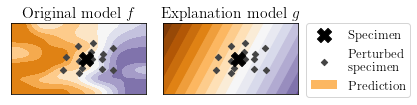

In [4]:
model_1 = [[0, 3, 3, 3, 4, 5, 6],
           [0, 1, 2, 3, 4, 6, 7],
           [2, 1, 1, 2, 4, 7, 8],
           [2, 1, 0, 3, 5, 8, 9],
           [0, 0, 2, 3, 5, 8, 7],
           [1, 2, 3, 4, 7, 8, 8],
           [0, 1, 1, 2, 4, 7, 9]]

specimen = [3.4, 3]
samples = [[2.226, 4.153],
           [2.348, 2.851],
           [3.014, 1.743],
           [3.033, 3.253],
           [3.046, 4.362],
           [3.197, 3.871],
           [3.677, 2.316],
           [3.726, 3.017],
           [3.747, 1.453],
           [4.216, 3.972],
           [4.219, 3.071],
           [4.268, 2.511],
           [4.811, 1.898],
           [4.823, 4.111]]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 1.66))

n_colors = 9
cmap = colormaps["PuOr"]
color_list = cmap(np.linspace(0.2, 0.8, n_colors))
limited_cmap = cmap.from_list(None, color_list, n_colors)

# Draw the original model.
ax1.imshow(model_1, aspect="auto", interpolation="spline36", cmap=limited_cmap, zorder=1)

# One-way limit adjustment
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

# Draw the explanation model.
x_shift = 1
xs = np.linspace(-1.5, 9, 21)
y_lower, y_upper = ax2.get_ylim()
for i in range(len(xs) - 1):
    x_left, x_right = xs[i], xs[i + 1]
    ax2.add_patch(Polygon([[x_left + x_shift, y_upper], [x_right + x_shift, y_upper], [x_right - x_shift, y_lower], [x_left - x_shift, y_lower]],
                          color=cmap(i / (len(xs) - 1)), zorder=1))

# Draw the specimen and samples.
for ax in [ax1, ax2]:
    specimen_scatter = ax.scatter(*specimen, marker="X", s=200, color="black", label="Specimen", zorder=3)
    sample_scatter = ax.scatter(*np.transpose(samples), marker="D", s=20, color="#444444", label="Perturbed\nspecimen", zorder=2)

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])

ax1.set_title("Original model $f$")
ax2.set_title("Explanation model $g$")

ax2.legend(handles=[specimen_scatter, sample_scatter, Patch(facecolor=cmap(0.3), label="Prediction")],
           loc="upper left", bbox_to_anchor=(1.06, 0, 1, 1), borderaxespad=0)

fig.tight_layout()
fig.savefig("local_explanation_intuition.pdf", bbox_inches="tight", pad_inches=0.01)

# Time slice perturbed specimen

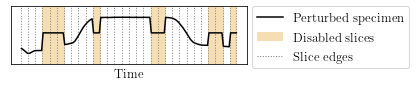

In [5]:
x_specimen = np.array([
       -1.1063418 , -1.1656456 , -1.2526374 , -1.3415721 , -1.4322048 , -1.4550485 , -1.4287048 , -1.3684625 , -1.3146541 , -1.2722754 , -1.2542504 , -1.2542197 , -1.251841  , -1.2500657 ,
       -1.2468776 , -1.2411818 , -1.2396082 , -1.2380135 , -1.2341763 , -1.2203975 , -1.1697385 , -1.1006108 , -1.0258962 , -0.93558884, -0.88417421, -0.85371495, -0.84358582, -0.83882853,
       -0.84645335, -0.84038707, -0.82724812, -0.81389111, -0.79743381, -0.76577004, -0.74279585, -0.72447388, -0.67712852, -0.59080309, -0.44373312, -0.28816081, -0.10902119,  0.08462928,
        0.24966126,  0.40831648,  0.54928985,  0.65982776,  0.77305573,  0.86722166,  0.93682208,  0.99255818,  1.0293233 ,  1.0557153 ,  1.0732023 ,  1.0790206 ,  1.0915871 ,  1.0874478 ,
        1.0889898 ,  1.0913814 ,  1.0921864 ,  1.0948221 ,  1.0851601 ,  1.0911659 ,  1.0944233 ,  1.0986195 ,  1.1016508 ,  1.1021671 ,  1.0978808 ,  1.1017863 ,  1.1016062 ,  1.1074177 ,
        1.1033168 ,  1.1034821 ,  1.1036607 ,  1.0999885 ,  1.1060396 ,  1.0992394 ,  1.0992394 ,  1.0977976 ,  1.0963147 ,  1.1031833 ,  1.096526  ,  1.0987213 ,  1.0956705 ,  1.0966499 ,
        1.0961123 ,  1.1045032 ,  1.0971317 ,  1.095683  ,  1.0978091 ,  1.1003299 ,  1.0931779 ,  1.094825  ,  1.0979872 ,  1.0962828 ,  1.0969227 ,  1.0969962 ,  1.0989989 ,  1.0990855 ,
        1.0918114 ,  1.0955936 ,  1.0916149 ,  1.0876206 ,  1.0806276 ,  1.0693824 ,  1.0520405 ,  1.0241189 ,  0.9777487 ,  0.92094535,  0.83671598,  0.73970484,  0.61568086,  0.49256867,
        0.3562807 ,  0.20406109,  0.0508259 , -0.11577667, -0.29423281, -0.43706207, -0.55848645, -0.65523925, -0.71304712, -0.75369042, -0.79114623, -0.82267273, -0.850532  , -0.86522268,
       -0.87047078, -0.87854848, -0.87962322, -0.88185813, -0.88887482, -0.89142317, -0.89926465, -0.90251426, -0.9109459 , -0.92075052, -0.92570512, -0.9323098 , -0.93853576, -0.94678263,
       -0.95301205, -0.95861803, -0.96227935, -0.97034698, -0.98846334, -1.0210645 , -1.0681173 , -1.1407762 , -1.2402908 , -1.3246524 ])

x_replacement = np.repeat(5.851781881776535e-11, len(x_specimen))
om = tx.om.TimeSliceOmitter(len(x_specimen), 30, x_replacement)


fig, ax = plt.subplots(1, 1, figsize=(6, 1.41))

z = om.z_specimen()
z[[3, 4, 5, 10, 18, 19, 26, 27, 29]] = 0
tx.plot.saliency1d(om, x_specimen=x_specimen, z_perturb=z, slice_edge_style="bar", ax=ax)

ax.margins(y=0.3)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

fig.tight_layout()
fig.savefig("timeslice_perturbed_specimen.pdf", bbox_inches="tight", pad_inches=0.01)

# Time domain replacements

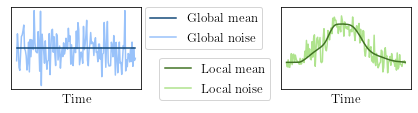

In [6]:
local_mean_repl = np.array([
       -0.91855763, -0.91988593, -0.92054486, -0.92099655, -0.92105835, -0.92134494, -0.92103407, -0.92045671, -0.92041566, -0.9194969 , -0.91934519, -0.9193494 , -0.91970546, -0.92026839,
       -0.91929329, -0.91673057, -0.9093735 , -0.89681439, -0.87825411, -0.85514515, -0.82771246, -0.79506051, -0.76098636, -0.72492129, -0.68786134, -0.64834157, -0.60933676, -0.56915619,
       -0.52754633, -0.4841239 , -0.44228944, -0.40120217, -0.36316003, -0.324837  , -0.28659817, -0.25104037, -0.21459458, -0.178214  , -0.14238573, -0.10685814, -0.06954816, -0.03301048,
        0.00288194,  0.0412638 ,  0.0843333 ,  0.12946837,  0.18262128,  0.24792318,  0.31029317,  0.39200734,  0.47356237,  0.5773444 ,  0.69439094,  0.79861045,  0.90688746,  1.00742087,
        1.10198372,  1.19201928,  1.27322336,  1.34162484,  1.39276915,  1.4303223 ,  1.45769629,  1.47484779,  1.48295601,  1.48999924,  1.49188321,  1.49501457,  1.49684407,  1.49809959,
        1.49757209,  1.49685818,  1.49362534,  1.49006945,  1.48620713,  1.4798613 ,  1.4798613 ,  1.47141338,  1.46044234,  1.44704337,  1.42938395,  1.40701961,  1.37786854,  1.34276799,
        1.29857954,  1.24795655,  1.18964823,  1.12738147,  1.06009341,  0.98774386,  0.91272751,  0.83368568,  0.75289681,  0.67138671,  0.58449157,  0.49358448,  0.4065025 ,  0.3187253 ,
        0.2371434 ,  0.15688145,  0.08442059,  0.01698922, -0.04657663, -0.10520288, -0.15834592, -0.20556017, -0.24842011, -0.28621121, -0.32226337, -0.35602935, -0.38574814, -0.41028606,
       -0.43416781, -0.4561545 , -0.48073155, -0.50234017, -0.52095727, -0.54001747, -0.55841772, -0.57722536, -0.59746763, -0.61418123, -0.63496611, -0.65491404, -0.67341985, -0.69334726,
       -0.71150599, -0.7287788 , -0.74372736, -0.7575813 , -0.77152983, -0.78459964, -0.79716272, -0.808487  , -0.82021073, -0.83131771, -0.8408167 , -0.84988988, -0.85752029, -0.86334892,
       -0.86756059, -0.87146074, -0.87472424, -0.87929075, -0.88404921, -0.88922987, -0.89446208, -0.89911268, -0.90430354, -0.90864608])

local_noise_repl = np.array([
       -0.97524318, -1.20615683, -0.76250389, -1.22406137, -1.23356388, -0.88294962, -0.3696182 , -1.06129802, -0.43175087, -0.40358046, -0.87925971, -0.46009346, -0.68439344, -0.84489271,
       -0.85223405, -0.95750319, -1.03913032, -0.66919175, -1.03934396, -0.98329466, -0.69788318, -0.7286633 , -0.92831529, -0.21418477, -0.57237246,  0.46433914, -0.61546544,  0.22797722,
       -0.42392417, -0.07154962, -0.71055001, -0.75857194,  0.38315178, -0.59087489,  0.60015565,  0.81574915, -1.16598345, -0.08588071,  0.56580516,  0.66342808,  0.01575659,  0.35314721,
        0.64541782, -0.87986509, -0.93677546, -0.86477966,  0.59425494,  1.20304621,  0.27810446, -0.07280077, -0.19035238,  0.19346717,  1.0864432 ,  0.73438996,  0.49972681,  0.96637729,
        1.25443216,  0.88701832,  1.86303118,  1.39884065,  1.93222612,  1.74310991,  1.73107576,  1.31259518,  1.4546457 ,  0.90433393,  1.36769656,  1.31744985,  1.00536346,  2.0091095 ,
        1.7346388 ,  1.47752046,  0.73110831,  1.63071872,  1.36062935,  1.20397523,  1.34125189,  1.16796958,  1.36859611,  0.74999958,  1.11033855,  1.13958703,  1.00724924,  1.94243661,
        1.27606891,  0.90212304,  0.45714597,  1.09478749,  1.38980541,  1.01337231,  1.31503415,  1.53604027,  0.30422136,  1.16377148,  0.46088732,  0.53750443,  1.08236877,  1.02799442,
       -0.22307185, -0.53069902, -0.05659447,  0.0360965 , -0.03809146,  0.52148964, -0.60005194, -0.0255463 ,  0.06605957, -0.83972651, -0.57644178, -0.94625849,  0.79190762, -0.86945948,
       -1.1234805 , -0.35421716, -0.78299868, -1.26314001, -1.13406247, -0.97821321, -0.91604811, -0.15386863, -0.22102584, -1.5226777 , -1.22404139, -0.26507443,  0.00206176, -0.59546715,
       -0.51116073, -1.57871198, -0.90516164, -0.84197312, -0.55209235, -1.10237366, -0.36766969, -0.72877587, -0.87951141, -0.85395133, -1.16478992, -0.73186021, -1.40829019, -0.32582982,
       -1.33531965, -1.21906006, -0.43311966, -1.0439967 , -1.07352297, -1.17366522, -0.84890163, -0.9242047 , -0.82029131, -0.98610119])

global_noise_repl = np.array([
       -0.81903171,  0.87897981,  0.02234594, -1.23493464, -1.42565513, -0.33871667,  0.70807526,  0.80831614,  1.07630489,  1.43270561, -0.07482634, -0.17942133, -0.51163574, -1.40253747,
       -0.88540973,  0.35281237, -1.5232305 ,  0.51966184, -0.56167033,  0.50206917, -0.00707094, -0.11384195,  2.343978  ,  0.332057  , -0.21878905, -0.29088965, -0.31902584,  1.01407645,
        0.12807831, -1.47195078,  2.30186248, -2.38090584,  0.85742239,  0.15387176, -0.23912556, -0.97129229,  0.43543686, -0.62358071, -1.35304702, -0.8460095 , -0.79599822,  0.89496226,
       -1.69275189, -0.01572293,  1.09121978,  1.16479457, -0.27922421,  0.69176668, -0.4285619 , -1.12129607,  0.87964364,  0.73669391, -0.77053253, -0.32389349,  0.1104736 , -1.28328055,
       -0.54510216, -0.08231223, -0.55785807,  0.30904671, -0.39938218, -0.15458577,  0.60037642, -0.00533636, -0.09153419,  1.23111596,  0.4084992 ,  0.7538385 , -1.03173322,  0.18915663,
       -1.01772158, -1.1225988 , -0.09023177, -0.00864792, -0.30496414,  1.05396396, -0.05574611,  1.58315119,  1.14948955, -1.06906269, -0.66712293, -0.26585629, -0.50474145, -0.97962349,
        1.34753629, -0.12150482,  0.18931986,  0.78491169,  1.73060262, -0.78703449, -1.12974103, -0.11059778,  0.20879848,  0.96043545,  0.2567511 ,  0.36140423,  0.32240608, -0.48555375,
        0.29706728,  0.63079958, -0.29374761, -0.25663486, -0.87634777,  0.22539512,  0.23397758, -0.7109941 ,  0.01273248, -1.82205706, -0.40238413, -0.3389946 ,  1.59575387,  0.28453687,
       -1.23102977,  0.32521128,  1.6587745 , -0.92018928, -1.14887289, -1.14206251, -1.12437252,  0.34941447,  0.1350358 , -0.56697054,  0.76909969,  0.1153231 , -1.72262242,  0.34053003,
       -0.49939688, -1.57567324, -0.73429349,  0.35640481, -0.98302444, -0.92308499, -1.67925298, -0.82123239,  0.13933309, -0.0607116 ,  2.3421279 , -1.46027557, -0.76497909, -1.19296795,
       -0.36333431, -0.41701592, -0.89570875, -0.09574321, -0.87051119,  0.35694577, -1.17125667, -0.00468404, -0.79892986, -0.66538141])


zero_repl = np.zeros(len(local_mean_repl))
global_mean_repl = np.repeat(5.85178188e-11, len(local_mean_repl))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 1.75), sharex=True, sharey=True)

l1, = ax1.plot(global_noise_repl, color="#99c2fa", label="Global noise")
l2, = ax1.plot(global_mean_repl, color="#134a79", label="Global mean")
l3, = ax2.plot(local_noise_repl, color="#afe38d", label="Local noise")
l4, = ax2.plot(local_mean_repl, color="#417324", label="Local mean")

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax1.set_xlabel("Time")
ax2.set_xlabel("Time")

ax1.legend(handles=[l2, l1], loc="upper left", bbox_to_anchor=(1.03, 1), borderaxespad=0)
fig.legend(handles=[l4, l3], loc="upper left", bbox_to_anchor=(0.369, 0.44), borderaxespad=0)

fig.tight_layout()
fig.savefig("time_domain_replacements__ucr_gunpoint.pdf", bbox_inches="tight", pad_inches=0.01)

# Fourier transform intuition & frequency slice perturbed specimen

In [7]:
facefour_64 = np.array([
        2.1507040e+00,  1.9414312e+00,  1.9414312e+00,  1.3033571e+00,  7.2065503e-01,  7.2065503e-01,  2.6305954e-01, -1.3553872e-01, -1.3553872e-01, -2.8831001e-01, -1.3553872e-01, -1.3553872e-01,
       -1.3553872e-01, -2.8831001e-01, -2.1192437e-01, -2.1192437e-01, -1.3553872e-01, -3.6682433e-01, -3.6682433e-01, -2.8831001e-01, -2.1192437e-01, -2.1192437e-01, -3.6682433e-01, -3.6682433e-01,
       -3.6682433e-01, -5.7024407e-02, -2.9043868e-01, -2.9043868e-01,  2.2207803e-03,  8.0735091e-02,  8.0735091e-02,  8.0735091e-02, -2.3713555e-01, -1.6805698e-01, -1.6805698e-01, -8.3402653e-01,
       -7.2059118e-01, -7.2059118e-01, -1.9772912e-01,  1.0414281e+00,  1.0414281e+00,  2.1043357e+00,  2.9007130e+00,  2.9007130e+00,  2.8124888e+00,  1.9724066e+00,  1.9724066e+00,  3.6572269e-01,
       -1.1979486e+00, -2.0196651e+00, -2.0196651e+00, -2.3313293e+00, -2.2985300e+00, -2.2985300e+00, -1.9266063e+00, -1.8314962e+00, -1.8314962e+00, -3.3418035e+00, -3.3622052e+00, -3.3622052e+00,
       -3.1403214e+00, -2.1985197e+00, -2.1985197e+00, -1.4673420e+00,  6.8513112e-01,  6.8513112e-01,  2.1369723e-01,  5.7130362e-01, -4.5162740e-01, -4.5162740e-01,  2.0149481e+00,  2.3930525e+00,
        2.3930525e+00,  3.4206240e+00,  3.1995984e+00,  3.1995984e+00,  3.4393013e+00,  6.5897932e-01,  6.5897932e-01, -1.0308977e-01, -4.8206149e-01, -4.8206149e-01, -6.1684409e-01, -6.7487193e-01,
       -6.7487193e-01, -6.0082840e-01, -4.6038006e-01, -2.7266344e-01, -2.7266344e-01, -8.7708632e-02,  1.0544304e-01,  1.0544304e-01,  1.0544304e-01,  1.7697966e-01,  1.7697966e-01,  2.6938101e-01,
        6.8779623e-02,  6.8779623e-02,  1.0041428e-02,  8.8555737e-02,  8.8555737e-02,  1.7933932e-01,  2.8910148e-02,  2.8910148e-02,  2.7241831e-01,  1.9603267e-01,  2.0191179e-01,  2.0191179e-01,
        3.9591599e-02,  3.9591599e-02,  3.9591599e-02, -4.3137500e-02, -4.3137500e-02, -4.3137500e-02, -4.3556674e-02, -4.3556674e-02, -4.3556674e-02,  3.9591599e-02, -4.4801838e-02, -4.4801838e-02,
        3.7137438e-02, -4.6836814e-02, -4.6836814e-02, -4.6836814e-02, -1.2998508e-01, -2.1192437e-01, -2.1192437e-01, -2.1192437e-01, -2.1192437e-01, -2.1192437e-01, -1.3154345e-01, -2.1192437e-01,
       -2.1192437e-01, -4.9604168e-02, -2.1192437e-01, -2.1192437e-01, -2.1192437e-01, -2.1192437e-01, -2.1192437e-01,  2.3356507e-02, -5.7024407e-02, -5.7024407e-02,  2.3356507e-02,  9.7400035e-02,
        1.7019110e-02,  1.7019110e-02,  2.5675039e-03,  6.8779623e-02,  6.8779623e-02,  2.5102319e-01,  2.3234587e-01,  2.3234587e-01,  3.7829672e-01,  2.8334872e-01,  2.8334872e-01,  4.6321725e-01,
        4.5830213e-01,  4.5830213e-01,  5.7130362e-01,  4.2535277e-01,  4.2535277e-01,  3.7985242e-01,  1.3377178e-01, -4.3556674e-02, -4.3556674e-02, -7.1476020e-02,  1.5746747e-01,  1.5746747e-01,
        3.1978766e-01,  4.0293594e-01,  4.0293594e-01,  4.0293594e-01,  2.6248758e-01,  2.6248758e-01, -1.3154345e-01, -3.7424456e-01, -3.7424456e-01, -6.1229279e-01, -6.1229279e-01, -6.1229279e-01,
       -6.1229279e-01, -2.1192437e-01, -4.9604168e-02, -4.9604168e-02,  3.5681175e-01,  3.5681175e-01,  3.5681175e-01,  3.5681175e-01, -4.6836814e-02, -4.6836814e-02, -4.4801838e-02, -3.8029206e-01,
       -3.8029206e-01, -2.9631780e-01, -3.8029206e-01, -3.8029206e-01, -1.2795011e-01, -1.2753093e-01, -4.3556674e-02, -4.3556674e-02, -1.2753093e-01,  1.2481101e-01,  1.2481101e-01,  1.2398503e-01,
        3.9591599e-02,  3.9591599e-02,  1.2153088e-01,  2.8042609e-01,  2.8042609e-01,  1.1205841e-01,  2.8910148e-02,  2.8910148e-02,  1.0529579e-01,  9.7400035e-02,  9.7400035e-02,  1.0041428e-02,
        7.8953142e-02,  2.0864194e-01,  2.0864194e-01,  1.3225628e-01,  5.8212756e-02,  5.8212756e-02,  4.7415203e-02,  1.3377178e-01,  1.3377178e-01,  1.0265709e-01,  3.0116650e-01,  3.0116650e-01,
        4.9698105e-01,  6.1848554e-01,  6.1848554e-01,  5.9834108e-01,  6.4534715e-01,  6.4534715e-01,  6.0173770e-01,  6.5139161e-01,  5.5312232e-01,  5.5312232e-01,  5.0239191e-01,  4.4120519e-01,
        4.4120519e-01,  3.7027949e-01,  4.0836762e-02,  4.0836762e-02, -4.3137500e-02, -4.3556674e-02, -4.3556674e-02, -4.4801838e-02, -3.8029206e-01, -3.8029206e-01, -2.9631780e-01, -2.9631780e-01,
       -2.9631780e-01, -3.8029206e-01, -7.9689557e-01, -5.4537961e-01, -5.4537961e-01, -7.0427482e-01, -7.8066048e-01, -7.8066048e-01, -1.4711424e+00, -1.8112841e+00, -1.8112841e+00, -2.6616639e+00,
       -2.6127828e+00, -2.6127828e+00, -2.5363972e+00, -8.2298427e-01, -8.2298427e-01,  6.9795960e-01,  2.2207522e+00,  2.2207522e+00,  2.6812845e+00,  2.8496522e+00,  1.8267213e+00,  1.8267213e+00,
        1.1444619e+00,  3.0696137e-01,  3.0696137e-01, -2.9631780e-01, -6.3180802e-01, -6.3180802e-01, -6.3180802e-01, -7.9689557e-01, -7.9689557e-01, -2.1192437e-01,  6.1548384e-01,  6.1548384e-01,
        1.2458866e+00,  1.3663445e+00,  1.3663445e+00,  1.2458866e+00,  5.3262472e-01, -4.9723558e-01, -4.9723558e-01, -1.3338260e+00, -1.5386772e+00, -1.5386772e+00, -1.0847642e+00, -7.9138589e-01,
       -7.9138589e-01, -3.3617267e-01,  3.7137438e-02,  3.7137438e-02,  2.0191179e-01, -2.1192437e-01, -2.1192437e-01, -5.3029139e-02, -5.3029139e-02, -5.3029139e-02, -1.3154345e-01, -3.7424456e-01,
       -3.7701192e-01, -3.7701192e-01, -5.3590714e-01, -2.1192437e-01, -2.1192437e-01,  2.6076348e-01,  8.0883877e-01,  8.0883877e-01,  1.1565306e+00,  1.4237737e+00,  1.4237737e+00,  1.2349147e+00,
        9.1227784e-01,  9.1227784e-01,  5.2652275e-01,  3.3602274e-01,  3.3602274e-01, -5.2639038e-03, -2.1192437e-01, -4.5566872e-01, -4.5566872e-01, -6.8582795e-01, -1.0211156e+00, -1.0211156e+00,
       -1.1499162e+00, -1.1774581e+00, -1.1774581e+00, -1.1294661e+00, -9.6551900e-01, -9.6551900e-01, -7.0427482e-01, -4.2803024e-01, -4.2803024e-01,  7.2437077e-04,  7.1516119e-01,  7.1516119e-01,
        1.3452500e+00,  1.8452838e+00])

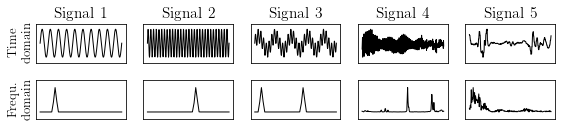

In [8]:
audio_signal_1 = np.array([
       -0.0760498 ,  0.00784302,  0.13143921, -0.21841431, -0.07565308,  0.13299561,  0.07305908, -0.13720703, -0.04040527,  0.19235229, -0.20367432, -0.06991577,  0.10748291,  0.15142822,
       -0.13052368, -0.07589722,  0.21194458, -0.13146973, -0.04458618,  0.05447388,  0.23184204, -0.16381836, -0.07543945,  0.19390869, -0.06497192, -0.06274414,  0.03909302,  0.23696899,
       -0.19134521, -0.10617065,  0.1289978 , -0.03512573, -0.10455322, -0.00320435,  0.25540161, -0.18991089, -0.09613037,  0.09222412,  0.03268433, -0.12341309, -0.0302124 ,  0.27590942,
       -0.12634277, -0.05776978,  0.03656006,  0.13284302, -0.13989258, -0.05950928,  0.26596069, -0.07397461, -0.05126953,  0.00201416,  0.17138672, -0.16937256, -0.06915283,  0.18130493,
       -0.04827881, -0.06723022, -0.03829956,  0.16943359, -0.14962769, -0.04232788,  0.12124634, -0.0020752 , -0.08712769, -0.06655884,  0.16989136, -0.1071167 , -0.01687622,  0.11132812,
        0.05877686, -0.10177612, -0.07214355,  0.15496826, -0.06118774, -0.00067139,  0.08740234,  0.09249878, -0.1126709 , -0.08651733,  0.10079956, -0.0296936 , -0.03866577,  0.05514526,
        0.10229492, -0.10333252, -0.08718872,  0.06381226,  0.01931763, -0.06826782,  0.03366089,  0.08865356, -0.06533813, -0.06500244,  0.05194092,  0.07559204, -0.07479858,  0.01449585,
        0.0680542 , -0.00939941, -0.06289673,  0.03829956,  0.11306763, -0.07983398, -0.00152588,  0.02944946,  0.02056885, -0.08618164,  0.00439453,  0.11245728, -0.07440186, -0.00265503,
       -0.00421143,  0.05050659, -0.10836792, -0.02587891,  0.11114502, -0.03829956,  0.01651001, -0.02859497,  0.10534668, -0.10873413, -0.0383606 ,  0.09472656,  0.00427246,  0.02383423,
       -0.03878784,  0.13800049, -0.10650635, -0.04281616,  0.05661011,  0.03607178, -0.00265503, -0.07254028,  0.13690186, -0.09558105, -0.04019165,  0.02301025,  0.0562439 , -0.02719116,
       -0.10559082,  0.13534546, -0.06787109, -0.04397583,  0.03259277,  0.08291626, -0.00045776, -0.13427734,  0.12329102, -0.02844238, -0.04431152,  0.0383606 ,  0.09597778,  0.02038574,
       -0.14923096,  0.10098267, -0.00222778, -0.065979  ,  0.00308228,  0.09552002,  0.03826904, -0.14465332,  0.07879639,  0.03485107, -0.08441162, -0.01934814,  0.07568359,  0.05749512,
       -0.14089966,  0.05700684,  0.0657959 , -0.07992554, -0.02981567,  0.05184937,  0.08514404, -0.12863159,  0.04342651,  0.0947876 , -0.07794189, -0.02090454,  0.01669312,  0.12515259,
       -0.14672852,  0.02423096,  0.09313965, -0.06680298, -0.01022339, -0.00610352,  0.14782715, -0.15777588,  0.00476074,  0.07113647, -0.03701782, -0.00540161, -0.03045654,  0.17388916,
       -0.16195679, -0.00299072,  0.05023193, -0.00930786, -0.00109863, -0.04144287,  0.1880188 , -0.15267944, -0.0045166 ,  0.03051758,  0.01763916, -0.01257324, -0.05911255,  0.17874146,
       -0.13040161,  0.00045776,  0.01617432,  0.03979492, -0.02316284, -0.07705688,  0.15621948, -0.10574341,  0.00360107,  0.00424194,  0.0569458 , -0.02197266, -0.08178711,  0.13534546,
       -0.07815552,  0.00253296, -0.00744629,  0.07244873, -0.01794434, -0.07556152,  0.11282349, -0.04983521, -0.00720215, -0.02462769,  0.07315063, -0.00524902, -0.0703125 ,  0.09399414,
       -0.02319336, -0.0218811 , -0.03515625,  0.05474854,  0.01156616, -0.06781006,  0.07611084,  0.00186157, -0.02816772, -0.0357666 ,  0.03640747,  0.03646851, -0.07080078,  0.06176758,
        0.01864624, -0.02490234, -0.02804565,  0.02038574,  0.05895996, -0.07568359,  0.04446411,  0.01904297, -0.01470947, -0.02450562,  0.0038147 ,  0.08001709, -0.08633423,  0.02606201,
        0.01193237, -0.00183105, -0.02090454, -0.00738525,  0.09863281, -0.08981323,  0.02194214,  0.00067139,  0.01849365, -0.02246094, -0.01824951,  0.11114502, -0.08807373,  0.0305481 ,
       -0.01696777,  0.0451355 , -0.02911377, -0.02142334,  0.11959839, -0.03720093,  0.0369873 ,  0.02822876,  0.05841064,  0.03335571, -0.05383301,  0.16931152, -0.07427979,  0.08651733,
       -0.0513916 ,  0.11599731, -0.05459595, -0.01663208,  0.07821655, -0.05410767,  0.0100708 , -0.07223511,  0.07022095, -0.06240845, -0.03131104,  0.03884888,  0.0062561 , -0.02127075,
       -0.03353882,  0.0413208 , -0.01034546, -0.05691528,  0.07339478, -0.03488159,  0.01879883, -0.09844971,  0.09255981, -0.06732178,  0.00177002,  0.00912476,  0.04364014, -0.04656982,
       -0.00204468,  0.02801514,  0.04754639, -0.03573608,  0.06994629,  0.03225708,  0.03411865, -0.02191162,  0.06274414,  0.06610107, -0.01757812,  0.07546997,  0.0375061 ,  0.04989624,
       -0.02835083,  0.07394409,  0.04345703, -0.00195312,  0.01028442,  0.06256104, -0.0032959 ,  0.01657104, -0.02160645,  0.10171509, -0.08459473,  0.06201172, -0.04321289,  0.06072998,
       -0.0866394 ,  0.02954102, -0.00714111, -0.01626587, -0.04391479,  0.01211548, -0.03500366, -0.01281738, -0.09246826,  0.08230591, -0.12811279,  0.06521606, -0.11904907,  0.09472656,
       -0.14294434,  0.02697754, -0.04351807,  0.01119995, -0.04779053, -0.00250244,  0.0098877 , -0.02957153, -0.04516602,  0.04364014, -0.02734375,  0.03399658, -0.0461731 ,  0.09091187,
       -0.04327393,  0.0201416 ,  0.02941895,  0.03555298,  0.03115845, -0.02627563,  0.09628296, -0.0222168 ,  0.04046631,  0.00576782,  0.07641602, -0.00494385, -0.00085449,  0.04055786,
        0.02987671, -0.01669312,  0.04595947,  0.03100586,  0.04397583, -0.06335449,  0.0776062 , -0.02124023])


signals = [np.sin(np.linspace(0, np.pi * 2 * 10, 400)),
           np.sin(np.linspace(0, np.pi * 2 * 30, 400)),
           (np.sin(np.linspace(0, np.pi * 2 * 5, 400)) + np.sin(np.linspace(0, np.pi * 2 * 30, 400))) / 2,
           audio_signal_1 * 6,
           facefour_64 * 0.3]
fft_subsample_rates = [4, 4, 4, 1, 1]
n_signals = len(signals)

fig, axs = plt.subplots(2, n_signals, figsize=(8, 2))

for i in range(n_signals):
    sig = signals[i]
    tx.plot.saliency1d(domain="time", ax=axs[0, i], legend_style=None, xlabel=None, specimen_linewidth=1, slice_edge_style=None, x_specimen=sig)
    tx.plot.saliency1d(domain="freq", ax=axs[1, i], legend_style=None, xlabel=None, specimen_linewidth=1, slice_edge_style=None, x_specimen=sig[::fft_subsample_rates[i]])

    axs[0, i].set_title(f"Signal {i + 1}")
    axs[0, i].margins(y=0.2)
    axs[0, i].get_xaxis().set_ticks([])
    axs[0, i].get_yaxis().set_ticks([])

    axs[1, i].margins(y=0.3)
    axs[1, i].get_xaxis().set_ticks([])
    axs[1, i].get_yaxis().set_ticks([])

axs[0, 0].set_ylabel("Time\ndomain")
axs[1, 0].set_ylabel("Frequ.\ndomain")

# Propagates because of shared axes

fig.tight_layout()
fig.savefig("fourier_transform_intuition.pdf", bbox_inches="tight")

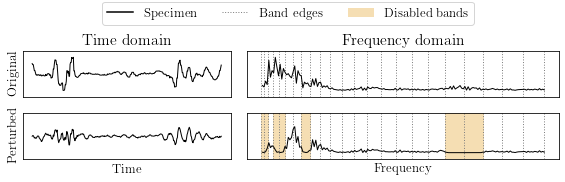

In [9]:
n_freq_slices = len(facefour_64) // 15
om = tx.om.FreqDiceFilterOmitterTemplate(1, n_freq_slices, tx.om.firls_filter).build(facefour_64)

z = np.repeat(1, n_freq_slices)
z[[0, 1, 3, 4, 7, 18, 19]] = 0


fig, axs = plt.subplots(2, 2, figsize=(8, 2.3), sharex="col", sharey="col", gridspec_kw={"width_ratios": [1, 1.5]})

tx.plot.saliency1d(domain="time", ax=axs[0, 0], legend_style=None, specimen_linewidth=1, slice_edge_style=None, x_specimen=facefour_64, xlabel=None)
tx.plot.saliency1d(domain="time", ax=axs[1, 0], legend_style=None, specimen_linewidth=1, slice_edge_style=None, x_specimen=om.Z2X(z))
tx.plot.saliency1d(om, domain="freq", ax=axs[0, 1], legend_style=None, specimen_linewidth=1, slice_edge_style="bar", xlabel=None)
tx.plot.saliency1d(om, domain="freq", ax=axs[1, 1], legend_style=None, specimen_linewidth=1, slice_edge_style="bar", z_perturb=z)

axs[0, 0].set_title("Time domain")
axs[0, 1].set_title("Frequency domain")
axs[0, 0].set_ylabel("Original")
axs[1, 0].set_ylabel("Perturbed")

axs[0, 0].get_xaxis().set_ticks([])
axs[0, 0].get_yaxis().set_ticks([])
axs[0, 0].margins(y=0.2)

axs[0, 1].get_xaxis().set_ticks([])
axs[0, 1].get_yaxis().set_ticks([])
axs[0, 1].margins(y=0.2)

legend_handles = [Line2D([0], [0], color="black", label="Specimen"),
                  Line2D([0], [0], color="gray", linewidth=1, linestyle=":", label="Band edges"),
                  Patch(facecolor="wheat", label="Disabled bands")]
fig.legend(handles=legend_handles, loc="lower center", bbox_to_anchor=(0.5, 0.95), borderaxespad=0, ncol=3)

fig.tight_layout(pad=0.95)
fig.savefig("freqslice_perturbed_specimen__ucr_facefour_test64.pdf", bbox_inches="tight")

# Frequency dice perturbed specimen

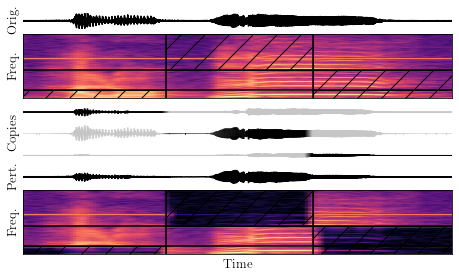

In [10]:
audio_signal_2 = wavfile.read("audio_signal_2.wav")[1][:, 0]

om_sliced = tx.om.FreqDiceFilterOmitter(len(audio_signal_2), 3, tx.Slicing(cont_edges=[0, 1000, 3500, 8000]),
                                        tx.om.ellip_filter, sample_rate=44100)
om_full   = tx.om.FreqDiceFilterOmitter(len(audio_signal_2), 1, tx.Slicing(cont_edges=[0, 1000, 3500, 8000]),
                                        tx.om.ellip_filter, sample_rate=44100)

# Generate omitted signals
Z = np.array([[0, 1, 1], [1, 1, 0], [0, 0, 1]])
audio_signal_2_om = om_sliced.omit(audio_signal_2, Z.flatten())

# Compute spectrograms
f, t, Sxx_orig = signal.spectrogram(audio_signal_2,    fs=44100, window="hann", nperseg=1024, mode="magnitude")
_, _, Sxx_om   = signal.spectrogram(audio_signal_2_om, fs=44100, window="hann", nperseg=1024, mode="magnitude")
Sxx_orig = Sxx_orig[f <= 8000, :]
Sxx_om   = Sxx_om  [f <= 8000, :]
f = f[f <= 8000]


fig = plt.figure(figsize=(6, 3.5))
gs = GridSpec(7, 1, height_ratios=[1, 4, 1, 1, 1, 1, 4])
ax_orig = fig.add_subplot(gs[0])
ax_origspec = fig.add_subplot(gs[1])
ax_om1 = fig.add_subplot(gs[2], sharey=ax_orig)
ax_om2 = fig.add_subplot(gs[3], sharey=ax_orig)
ax_om3 = fig.add_subplot(gs[4], sharey=ax_orig)
ax_om = fig.add_subplot(gs[5], sharey=ax_orig)
ax_omspec = fig.add_subplot(gs[6], sharex=ax_origspec, sharey=ax_origspec)

# Plot spectrograms
spec_norm = LogNorm()
ax_origspec.pcolormesh(t, f, Sxx_orig, shading="gouraud", cmap="magma", norm=spec_norm, rasterized=True)
ax_omspec.pcolormesh(t, f, Sxx_om, shading="gouraud", cmap="magma", norm=spec_norm, rasterized=True)

# Plot original and perturbed time series
ax_orig.plot(audio_signal_2, color="black", rasterized=True)
ax_om.plot(audio_signal_2_om, color="black", rasterized=True)

# Plot intermediate time series
for ts, ax in enumerate((ax_om1, ax_om2, ax_om3)):
    signal_om = om_full.omit(audio_signal_2, Z[ts])
    lc = LineCollection([[[x1, y1], [x1 + 1, y2]] for x1, (y1, y2) in enumerate(zip(signal_om[:-1], signal_om[1:]))],
                        cmap="Greys", norm=plt.Normalize(-0.5, 1), rasterized=True)
    lc.set_array(om_sliced._fade_matrix[ts])
    ax.add_collection(lc)

ax_orig.set_ylabel("Orig.")
ax_origspec.set_ylabel("Freq.")
ax_om2.set_ylabel("Copies")
ax_om.set_ylabel("Pert.")
ax_omspec.set_ylabel("Freq.")
ax_omspec.set_xlabel("Time")

for ax in (ax_orig, ax_om1, ax_om2, ax_om3, ax_om):
    ax.margins(x=0, y=0)
    ax.xaxis.set_visible(False)
    plt.setp(ax.spines.values(), visible=False)
    ax.tick_params(left=False, labelleft=False)
    ax.patch.set_visible(False)

for ax in (ax_origspec, ax_omspec):
    ax.set_xlim(t[0], t[-1])
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    # Spectrogram dice edges
    time_edges = om_sliced.time_slicing.cont_edges
    freq_edges = om_sliced.freq_slicing.cont_edges
    ax.axvline(time_edges[1], color="black")
    ax.axvline(time_edges[2], color="black")
    ax.axhline(freq_edges[1], color="black")
    ax.axhline(freq_edges[2], color="black")
    # Disabled dices
    itr = np.nditer(Z, flags=["multi_index"])
    for enabled in itr:
        if enabled == 0:
            ts, fs = itr.multi_index
            ax.add_patch(plt.Rectangle((time_edges[ts], freq_edges[fs]), time_edges[ts + 1] - time_edges[ts],
                                       freq_edges[fs + 1] - freq_edges[fs], fill=False, color="black", lw=1, hatch="/"))

fig.tight_layout(pad=-0.5)
fig.savefig("freqdice_perturbed_specimen.pdf", bbox_inches="tight", dpi=200, pad_inches=0.01)

# Bandstop filter frequency responses

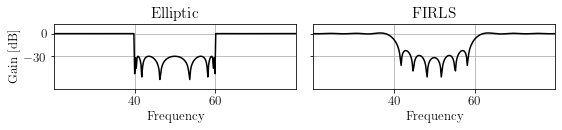

In [11]:
def plot_filter(ax, freq, response):
    ax.plot(freq, 20 * np.log10(np.abs(response)), color="black")


fs = 200
low, high = 40, 60

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2), sharex=True, sharey=True)

# Elliptic filter
sos = tx.om.ellip_filter(fs, [(low, high)])[0][1]
plot_filter(ax1, *signal.sosfreqz(sos, fs=fs))

# FIRLS filter
b, a = tx.om.firls_filter(fs, [(low, high)])[0][1]
plot_filter(ax2, *signal.freqz(b, a, fs=fs))

ax1.margins(y=0.2)
ax1.set_yticks([-30, 0])
ax1.set_xticks([low, high])
ax1.set_xlim(low - 20, high + 20)

ax1.grid()
ax2.grid()

ax1.set_ylabel("Gain [dB]")
ax1.set_xlabel("Frequency")
ax2.set_xlabel("Frequency")

ax1.set_title("Elliptic")
ax2.set_title("FIRLS")

fig.tight_layout()
fig.savefig("bandstop_filter_frequency_responses.pdf", bbox_inches="tight")

# Coherence assumption

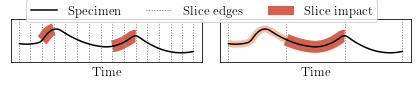

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 1.2), sharex=True, sharey=True)


tck = interpolate.splrep([0, 10, 16, 18, 40, 75, 80, 85, 120], [-1, -1, 0, 1, 0, 0, 1, 0, -3], k=2)
x_specimen = interpolate.splev(np.linspace(0, 120, 120), tck)


om = tx.om.TimeSliceOmitter(len(x_specimen), 15)
impacts = [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
tx.plot.saliency1d(om, impacts, x_specimen, slice_edge_style="bar", impact_cmap_range=(0.2, 0.8),
               legend_style=None, impact_legend=None, ax=ax1)

om = tx.om.TimeSliceOmitter(len(x_specimen), 3)
impacts = [1, 2, 0]
legend_handles = tx.plot.saliency1d(om, impacts, x_specimen, slice_edge_style="bar", impact_cmap_range=(0.2, 0.8),
                                    legend_style=None, return_legend_handles=True, impact_legend=None, ax=ax2)


ax1.margins(y=0.4)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

legend_handles.append(Patch(facecolor=colormaps["RdBu_r"](0.8), label="Slice impact"))
fig.legend(handles=legend_handles, bbox_to_anchor=(0.873, 0.99), borderaxespad=0, ncol=len(legend_handles))

fig.tight_layout()
fig.savefig("coherence_assumption.pdf", bbox_inches=Bbox.from_extents(0.2, 0.2, 5.85, 1.42))

# Correlation as a similarity measure

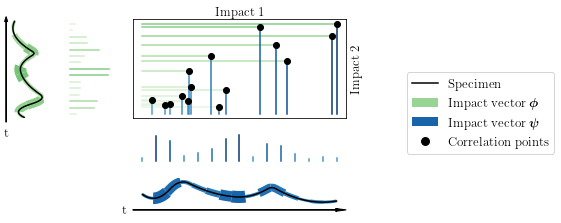

In [13]:
tck = interpolate.splrep([0, 16, 18, 40, 75, 80, 85, 120], [-1, 0, 1, 0, 0, 1, 0, -3], k=2)
x_specimen = interpolate.splev(np.linspace(0, 120, 100), tck)

impacts_1 = [0.14 , 0.606, 0.687, 0.206, 0.25 , 0.24,  0.975, 0.997, 0.236, 0.35 , 0.744, 0.43 , 0.395, 0.051, 0.117]
impacts_2 = [0.108, 0.928, 0.738, 0.195, 0.293, 0.458, 0.83 , 0.965, 0.137, 0.623, 0.563, 0.255, 0.072, 0.147, 0.1  ]
n_slices = len(impacts_1)
max_impact = max(max(impacts_1), max(impacts_2))

cmap_1 = colormaps["Greens"]
cmap_2 = colormaps["Blues"]


def query_cmap(cmap, lower, upper, p):
    p = p * (upper - lower) + lower
    return cmap(1 - ((1 - p) * 0.9))  # avoid too light colors


def plot_timeslices(ax1, ax2):
    om = tx.om.TimeSliceOmitter(len(x_specimen), n_slices)
    tx.plot.saliency1d(om, impacts_1, x_specimen, slice_edge_style=None, impact_cmap=cmap_1,
                       impact_cmap_range=(0.1, 0.5), legend_style=None, impact_legend=None, xlabel=None, ax=ax1)
    tx.plot.saliency1d(om, impacts_2, x_specimen, slice_edge_style=None, impact_cmap=cmap_2,
                       impact_cmap_range=(0.5, 0.8), legend_style=None, impact_legend=None, xlabel=None, ax=ax2)


def plot_bars(ax1, ax2):
    for i in range(n_slices):
        ax1.plot([0, impacts_1[i]], [i, i], color=query_cmap(cmap_1, 0, 0.4, impacts_1[i] / max_impact))
    for i in range(n_slices):
        ax2.plot([i, i], [0, impacts_2[i]], color=query_cmap(cmap_2, 0.5, 1, impacts_2[i] / max_impact))


def plot_scatter(ax):
    ax.scatter(impacts_1, impacts_2, color="black", zorder=2)
    for i in range(n_slices):
        ax.plot([0, impacts_1[i]], [impacts_2[i], impacts_2[i]], color=query_cmap(cmap_1, 0, 0.4, impacts_2[i] / max_impact), zorder=1)
    for i in range(n_slices):
        ax.plot([impacts_1[i], impacts_1[i]], [0, impacts_2[i]], color=query_cmap(cmap_2, 0.5, 1, impacts_1[i] / max_impact), zorder=1)


def setup_rotated_ax_timeslice_1(fig, rect, extremes):
    tr = Affine2D().scale(1, -5).rotate_deg(90)
    grid_helper = floating_axes.GridHelperCurveLinear(tr, extremes=extremes)
    ax = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax)

    aux_ax = ax.get_aux_axes(tr)
    return ax, aux_ax


def add_x_axis_arrow(ax, yshift, text_xshift_factor, text_yshift_factor):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xdiff, ydiff = xmax - xmin, ymax - ymin

    # Draw arrow.
    ax.arrow(xmin, ymin + yshift, xdiff, 0, head_width=ydiff / 10, head_length=xdiff / 20,
             fc="k", ec="k", linewidth=1, overhang=0.3, length_includes_head=True, clip_on=False)
    # Draw arrow label.
    ax.text(xmin + xdiff * text_xshift_factor, ymin + yshift - ydiff * text_yshift_factor, "t")


fig = plt.figure(figsize=(8, 3.3))
gs = GridSpec(3, 4, width_ratios=[1, 1, 5, 1], height_ratios=[3.5, 1, 1]) 

# Create the subplots.
arrow_yshift = -1.1
ax_timeslice_1, ax_timeslice_1_aux = setup_rotated_ax_timeslice_1(fig, gs[0, 0],
                                                                  (0, len(x_specimen), min(x_specimen) + arrow_yshift, max(x_specimen) + 0.4))
ax_timeslice_2 = fig.add_subplot(gs[2, 2])
ax_bar_1 = fig.add_subplot(gs[0, 1])
ax_bar_2 = fig.add_subplot(gs[1, 2])
ax_scatter = fig.add_subplot(gs[0, 2])

# Turn off unwanted spines and ticks.
for axis in ax_timeslice_1.axis.values():
    axis.set_visible(False)
ax_timeslice_1.axis("off")  # makes backdrop transparent for consistency
ax_timeslice_2.axis("off")
ax_bar_1.axis("off")
ax_bar_2.axis("off")
#ax_scatter.axis("equal")  # only looks nice when plot has square shape
ax_scatter.tick_params("x", which="major", bottom=False, labelbottom=False)
ax_scatter.tick_params("y", which="major", left=False, labelleft=False)

# Add axis labels to the scatter plot.
ax_scatter.set_xlabel("Impact 1")
ax_scatter.set_ylabel("Impact 2")
ax_scatter.xaxis.set_label_position("top")
ax_scatter.yaxis.set_label_position("right")

# Plot the data.
plot_timeslices(ax_timeslice_1_aux, ax_timeslice_2)
plot_bars(ax_bar_1, ax_bar_2)
plot_scatter(ax_scatter)

# Make sure the impacts do not clip outside the axes.
ax_timeslice_2.margins(y=0.2)

# Add arrows to the time series.
add_x_axis_arrow(ax_timeslice_1_aux, arrow_yshift, -0.13, 0.06)
add_x_axis_arrow(ax_timeslice_2, arrow_yshift, -0.05, 0.12)

# Add legend.
legend_elements = [Line2D([0], [0], color="black", label="Specimen"),
                   Patch(facecolor=cmap_1(0.4), label=r"Impact vector $\bm{\phi}$"),
                   Patch(facecolor=cmap_2(0.8), label=r"Impact vector $\bm{\psi}$"),
                   Line2D([0], [0], color="white", marker="o", markerfacecolor="black", markersize=10, label="Correlation points")]
ax_legend = fig.add_subplot(gs[:, 3])
ax_legend.axis("off")
ax_legend.legend(handles=legend_elements, loc="center left", borderaxespad=3)

fig.tight_layout()
fig.subplots_adjust(wspace=0.25, hspace=0.3)
fig.savefig("correlation_similarity.pdf", bbox_inches="tight")

# Experiment results

In [14]:
explainer_names_to_latex = {name: label.replace("timeXplain Time Slice", r"\texttt{timeXplain}").replace("SAX-VSM", r"\texttt{SAX-VSM}")
                                       .replace("WEASEL", r"\texttt{WEASEL}").replace("Tree SHAP", r"\texttt{Tree SHAP}").replace("CAM", r"\texttt{CAM}")
                            for name, label in ex.EXPLAINER_NAMES_TO_LABELS.items()}
classifier_names_to_latex = {name: r"\texttt{" + label + "}"
                             for name, label in ex.CLASSIFIER_NAMES_TO_LABELS.items()}

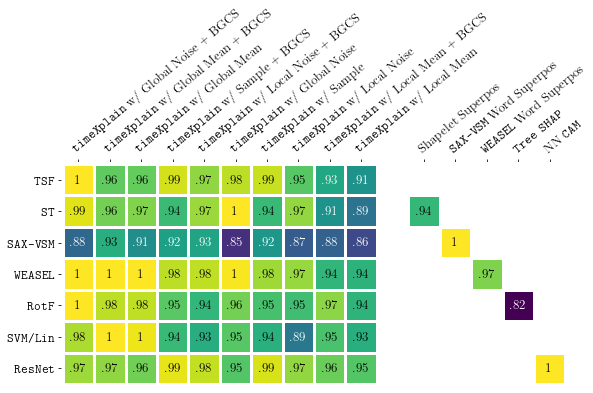

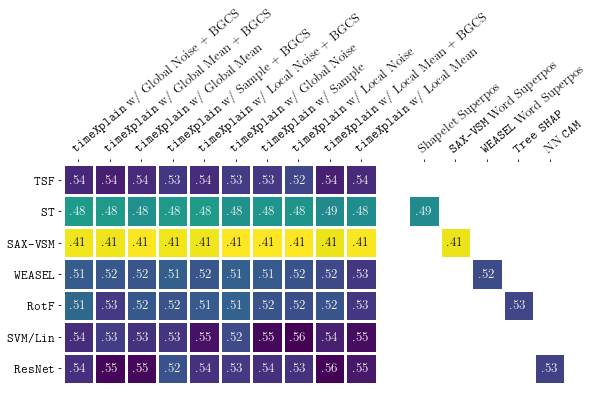

In [15]:
col_labels = ["shap_timeslice_global_noise_bgcs", "shap_timeslice_global_mean_bgcs", "shap_timeslice_global_mean",
              "shap_timeslice_sample_bgcs", "shap_timeslice_local_noise_bgcs", "shap_timeslice_global_noise",
              "shap_timeslice_sample", "shap_timeslice_local_noise", "shap_timeslice_local_mean_bgcs", "shap_timeslice_local_mean",
              "shapelet_superpos", "sax_vsm_word_superpos", "weasel_word_superpos", "tree_shap", "neural_cam"]
row_labels = ["time_series_forest", "shapelet_transform", "sax_vsm", "weasel", "rotation_forest", "svm_linear", "resnet"]

col_labels = [ explainer_names_to_latex[l] for l in col_labels]
row_labels = [classifier_names_to_latex[l] for l in row_labels]

fidelity_mat = np.array([
    [1.        , 0.95668374, 0.95793732, 0.98771206, 0.97032623, 0.98264007, 0.98503615, 0.95421988, 0.92935079, 0.91305272,     np.nan,     np.nan,     np.nan,     np.nan,     np.nan],
    [0.99121889, 0.96337788, 0.96660224, 0.94398611, 0.97349482, 1.        , 0.94256233, 0.97101929, 0.91358241, 0.89034299, 0.94109161,     np.nan,     np.nan,     np.nan,     np.nan],
    [0.8825423 , 0.93489662, 0.91067008, 0.92393369, 0.92658359, 0.8468997 , 0.91708908, 0.87462472, 0.8787667 , 0.8623328 ,     np.nan, 1.        ,     np.nan,     np.nan,     np.nan],
    [0.99950129, 1.        , 0.99996382, 0.98259676, 0.98287225, 0.99804897, 0.97500369, 0.97247307, 0.93927869, 0.9371904 ,     np.nan,     np.nan, 0.96553852,     np.nan,     np.nan],
    [1.        , 0.98253227, 0.98295688, 0.95446134, 0.94038863, 0.96325505, 0.94885586, 0.94593984, 0.96934906, 0.93785677,     np.nan,     np.nan,     np.nan, 0.82318224,     np.nan],
    [0.97838757, 1.        , 0.99522311, 0.94317646, 0.93332782, 0.95426712, 0.93533358, 0.89426224, 0.94906646, 0.93395942,     np.nan,     np.nan,     np.nan,     np.nan,     np.nan],
    [0.97393941, 0.97088261, 0.96227362, 0.99329206, 0.98410109, 0.95286848, 0.98911412, 0.97121127, 0.96025728, 0.95301014,     np.nan,     np.nan,     np.nan,     np.nan, 1.        ]])

informat_mat = np.array([
    [0.53931564, 0.54380072, 0.53828715, 0.53255452, 0.53797885, 0.53045072, 0.5318001 , 0.52498531, 0.54335446, 0.53886095,     np.nan,     np.nan,     np.nan,     np.nan,     np.nan],
    [0.47556095, 0.47685851, 0.48234414, 0.47715118, 0.47600365, 0.48117263, 0.47862028, 0.48012647, 0.48636346, 0.48461101, 0.48524014,     np.nan,     np.nan,     np.nan,     np.nan],
    [0.41195593, 0.41240131, 0.4096853 , 0.41207656, 0.41235447, 0.40868063, 0.4090366 , 0.4087391 , 0.41288568, 0.40984064,     np.nan, 0.41293263,     np.nan,     np.nan,     np.nan],
    [0.5137603 , 0.5161465 , 0.51771009, 0.51154627, 0.5169584 , 0.51112077, 0.51470214, 0.51944417, 0.52361646, 0.53244158,     np.nan,     np.nan, 0.52203275,     np.nan,     np.nan],
    [0.50656557, 0.53213115, 0.51572131, 0.5184082 , 0.51418197, 0.51021803, 0.51833115, 0.52082951, 0.51821803, 0.53290164,     np.nan,     np.nan,     np.nan, 0.52544965,     np.nan],
    [0.53694859, 0.52957836, 0.53483839, 0.53369213, 0.54908919, 0.52198162, 0.55302962, 0.5564851 , 0.54328061, 0.55170481,     np.nan,     np.nan,     np.nan,     np.nan,     np.nan],
    [0.53590399, 0.55372788, 0.55327246, 0.51898219, 0.53525602, 0.53171989, 0.53619377, 0.53490915, 0.55511571, 0.54619552,     np.nan,     np.nan,     np.nan,     np.nan, 0.52704345]])


fig, ax = plt.subplots(1, 1, figsize=(8.5, 10))
tx.plot.matrix(fidelity_mat, row_labels, col_labels, col_seps=10,
               ax=ax, cmap="viridis",   text_len=3, omit_leading_zero=True, trailing_zeros=True, cbar=False)
fig.tight_layout()
fig.savefig(f"experiment_fidelity_matrix.pdf", bbox_inches="tight", pad_inches=0)

fig, ax = plt.subplots(1, 1, figsize=(8.5, 10))
tx.plot.matrix(informat_mat, row_labels, col_labels, col_seps=10,
               ax=ax, cmap="viridis_r", text_len=3, omit_leading_zero=True, trailing_zeros=True, cbar=False)
fig.tight_layout()
fig.savefig(f"experiment_informativeness_matrix.pdf", bbox_inches="tight", pad_inches=0)

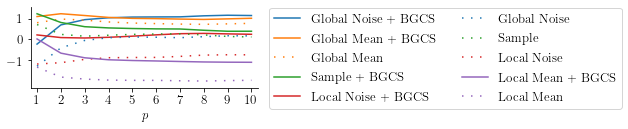

In [16]:
explainer_labels = ["shap_timeslice_global_noise_bgcs", "shap_timeslice_global_mean_bgcs", "shap_timeslice_global_mean",
                    "shap_timeslice_sample_bgcs", "shap_timeslice_local_noise_bgcs", "shap_timeslice_global_noise",
                    "shap_timeslice_sample", "shap_timeslice_local_noise", "shap_timeslice_local_mean_bgcs", "shap_timeslice_local_mean"]
explainer_labels = [explainer_names_to_latex[l][23:] for l in explainer_labels]

fidelity_prog = np.array([
    [-0.23301274,  1.10429872,  0.80520947,  1.23924866,  0.21237539, -1.30896431,  0.71673616, -1.2014271 ,  0.01691105, -1.3513753 ],
    [ 0.69767232,  1.24126678,  0.98220947,  0.81602503,  0.0828991 , -0.41598025,  0.23815087, -1.1356231 , -0.6727768 , -1.83384343],
    [ 0.95336772,  1.15404096,  0.92977131,  0.61144422,  0.06316803, -0.05626992,  0.15015224, -0.97538827, -0.89813442, -1.93215187],
    [ 1.04425415,  1.06181707,  0.84208791,  0.55207297,  0.0968443 ,  0.07627978,  0.19687823, -0.89485888, -0.99422019, -1.98115535],
    [ 1.07823005,  1.01622621,  0.78869576,  0.52318341,  0.15047906,  0.11297388,  0.23791703, -0.88392551, -1.03023443, -1.99354546],
    [ 1.08510215,  1.00282599,  0.76118458,  0.5057409 ,  0.2161361 ,  0.09986383,  0.25582032, -0.87976266, -1.05240912, -1.9945021 ],
    [ 1.08926618,  0.98140798,  0.73696616,  0.4996658 ,  0.27144665,  0.077267  ,  0.26614975, -0.83009311, -1.07830936, -2.01376705],
    [ 1.13947214,  0.96436364,  0.7255056 ,  0.4379196 ,  0.28656398,  0.12849068,  0.21295988, -0.76766569, -1.10054952, -2.02706032],
    [ 1.16744654,  0.99188858,  0.74903519,  0.38994481,  0.26256552,  0.17087529,  0.13688123, -0.75076558, -1.11226542, -2.00560617],
    [ 1.15385135,  1.02019171,  0.77442854,  0.39099368,  0.24307577,  0.16463685,  0.113558  , -0.75410887, -1.11634226, -1.99028478]])


fig, ax = plt.subplots(figsize=(9, 2))

x = np.arange(1, fidelity_prog.shape[0] + 1)
explainer_colors     = ["C0", "C1", "C1", "C2", "C3", "C0", "C2", "C3", "C4", "C4"]
for y, label, color in zip(fidelity_prog.T, explainer_labels, explainer_colors):
    linestyle = "-" if "BGCS" in label else (0, (1, 5))
    ax.plot(x, y, label=label, color=color, ls=linestyle)

ax.margins(x=0.03, y=0.1)
ax.set_xticks(x)
ax.set_yticks([-1, 0, 1])
ax.set_xlabel(r"$p$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.07), ncol=2)

fig.tight_layout()
fig.savefig(f"experiment_fidelity_progression.pdf", bbox_inches="tight", pad_inches=0.01)

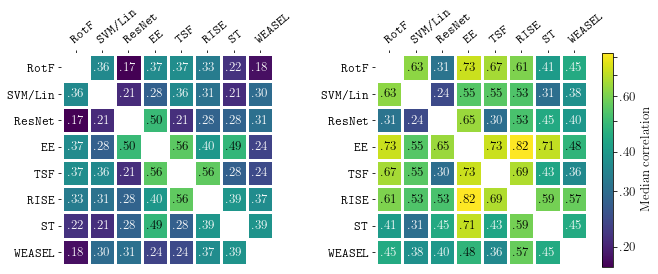

In [17]:
simdict_timeslice = {
    frozenset({'elastic_ensemble', 'resnet'}): 0.49934428000000003,
    frozenset({'elastic_ensemble', 'rise'}): 0.39554453,
    frozenset({'elastic_ensemble', 'rotation_forest'}): 0.36713405499999996,
    frozenset({'elastic_ensemble', 'shapelet_transform'}): 0.48566931,
    frozenset({'elastic_ensemble', 'svm_linear'}): 0.278759285,
    frozenset({'elastic_ensemble', 'time_series_forest'}): 0.556496125,
    frozenset({'elastic_ensemble', 'weasel'}): 0.23589094,
    frozenset({'resnet', 'rise'}): 0.284415915,
    frozenset({'resnet', 'rotation_forest'}): 0.17260307,
    frozenset({'resnet', 'shapelet_transform'}): 0.28379959,
    frozenset({'resnet', 'svm_linear'}): 0.20938472,
    frozenset({'resnet', 'time_series_forest'}): 0.21249527,
    frozenset({'resnet', 'weasel'}): 0.306475825,
    frozenset({'rise', 'rotation_forest'}): 0.333226195,
    frozenset({'rise', 'shapelet_transform'}): 0.391616075,
    frozenset({'rise', 'svm_linear'}): 0.31113481,
    frozenset({'rise', 'time_series_forest'}): 0.563673715,
    frozenset({'rise', 'weasel'}): 0.36935399,
    frozenset({'rotation_forest', 'shapelet_transform'}): 0.21766271,
    frozenset({'rotation_forest', 'svm_linear'}): 0.36251416,
    frozenset({'rotation_forest', 'time_series_forest'}): 0.37032978,
    frozenset({'rotation_forest', 'weasel'}): 0.183573605,
    frozenset({'shapelet_transform', 'svm_linear'}): 0.2117473,
    frozenset({'shapelet_transform', 'time_series_forest'}): 0.27872298,
    frozenset({'shapelet_transform', 'weasel'}): 0.38620743,
    frozenset({'svm_linear', 'time_series_forest'}): 0.36149812,
    frozenset({'svm_linear', 'weasel'}): 0.29858031500000004,
    frozenset({'time_series_forest', 'weasel'}): 0.244918735
}

simdict_freqslice = {
    frozenset({'elastic_ensemble', 'resnet'}): 0.65139952,
    frozenset({'elastic_ensemble', 'rise'}): 0.823891515,
    frozenset({'elastic_ensemble', 'rotation_forest'}): 0.7291545349999999,
    frozenset({'elastic_ensemble', 'shapelet_transform'}): 0.71461427,
    frozenset({'elastic_ensemble', 'svm_linear'}): 0.54550641,
    frozenset({'elastic_ensemble', 'time_series_forest'}): 0.726372335,
    frozenset({'elastic_ensemble', 'weasel'}): 0.47943566,
    frozenset({'resnet', 'rise'}): 0.52734125,
    frozenset({'resnet', 'rotation_forest'}): 0.31427967,
    frozenset({'resnet', 'shapelet_transform'}): 0.44707739,
    frozenset({'resnet', 'svm_linear'}): 0.24446754,
    frozenset({'resnet', 'time_series_forest'}): 0.30413119,
    frozenset({'resnet', 'weasel'}): 0.398292545,
    frozenset({'rise', 'rotation_forest'}): 0.6101161,
    frozenset({'rise', 'shapelet_transform'}): 0.59452132,
    frozenset({'rise', 'svm_linear'}): 0.53455061,
    frozenset({'rise', 'time_series_forest'}): 0.68572331,
    frozenset({'rise', 'weasel'}): 0.57463513,
    frozenset({'rotation_forest', 'shapelet_transform'}): 0.40702494,
    frozenset({'rotation_forest', 'svm_linear'}): 0.63198415,
    frozenset({'rotation_forest', 'time_series_forest'}): 0.6686041,
    frozenset({'rotation_forest', 'weasel'}): 0.44976018500000003,
    frozenset({'shapelet_transform', 'svm_linear'}): 0.30580954,
    frozenset({'shapelet_transform', 'time_series_forest'}): 0.433535325,
    frozenset({'shapelet_transform', 'weasel'}): 0.44867440999999997,
    frozenset({'svm_linear', 'time_series_forest'}): 0.55387967,
    frozenset({'svm_linear', 'weasel'}): 0.37918899500000003,
    frozenset({'time_series_forest', 'weasel'}): 0.361591145
}

vmin = min(min(simdict_timeslice.values()), min(simdict_freqslice.values()))
vmax = max(max(simdict_timeslice.values()), max(simdict_freqslice.values()))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.6, 4))

tx.plot.similarity_median_matrix(simdict_timeslice, ax=ax1, model_labels=classifier_names_to_latex, vmin=vmin, vmax=vmax, cbar=False)
tx.plot.similarity_median_matrix(simdict_freqslice, ax=ax2, model_labels=classifier_names_to_latex, vmin=vmin, vmax=vmax, cbar_label="Median correlation")

fig.tight_layout()
fig.savefig("experiment_similarity_matrix.pdf", bbox_inches="tight")